# Aim
This project is intended to fit an regression model into a sales dataset so we can see how much of a change in 'Discount' and 'Unit price' of a product affect total sales of a product. 

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Load dataset

In [16]:
Orders = pd.read_csv('Orders_1.csv')
Orders.head(1)

,row,order_priority,order_date,order_id,discount,unit_price,order_quantity,sales,shipping_cost,product_base_margin,...,city,postal_code,ship_date,ship_mode,subregion,new_order_date,year_order_date,new_discount,new_margin,profit
0,3689,Medium,28/01/2011,97,3%,3.0,26,75.66,1.0,38.0%,...,Jakarta,NaN,29/01/2011,Regular Air,NaN,2011-01-28,2011,0.03,0.38,26.3


 ##### Clean data so 1% of discount is 1 unit

In [3]:
Orders['The_discount'] = Orders['new_discount']*100
Orders['The_discount']

0      3.0
1      0.0
2      1.0
3      9.0
4      5.0
      ... 
143    9.0
144    6.0
145    2.0
146    7.0
147    9.0
Name: The_discount, Length: 148, dtype: float64

 ##### Prepare Data so Data can be used in sklearn

In [4]:
y = Orders['sales']
X = Orders[['The_discount', 'unit_price']]

 ##### use sklearn to seprate data into test set and training set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_test.head(5)

,The_discount,unit_price
16,0.0,6.0
55,9.0,6.0
91,7.0,281.0
88,0.0,7.0
32,7.0,501.0


 ##### Fit regression model into dataset

In [6]:
from sklearn.linear_model import LinearRegression
# create a Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [7]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [109.82851473  23.22959313]


In [8]:
# lm.fit(X_train,y_train): fitting regression model to Trainning data
# use training data fitted regression model to predict Y test data using X test data
predictions = lm.predict(X_test)

##### create regression plot
The sklean prediction is reliable as there is a positive releation between test dataset and prediction 

Text(0, 0.5, 'Predicts')

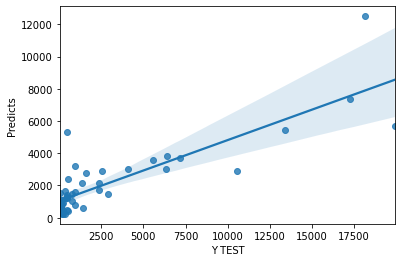

In [9]:
import seaborn as sns
chart = sns.regplot(x=y_test, y=predictions)
chart.set_xlabel("Y TEST", fontsize = 10)
chart.set_ylabel("Predicts", fontsize = 10)

In [10]:
lm.coef_

array([109.82851473,  23.22959313])

#### Analysis Result
Additional 1% of Discount, $110 of sales will be made

Additional $1 of Unit price, $23.2 will be made

In [11]:
# create coefficient table
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
The_discount,109.828515
unit_price,23.229593


##### work out standard error of the coefficient values

In [12]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([lm.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)
err

array([64.88387826,  5.4042958 ])

#### Analysis Result with standard error considered
Additional 1% of Discount, $110 ± $64.9 of sales will be made

Additional $1 of Unit price, $23.2 ± $5.4 of sales will be made

In [13]:
coeffecients['STD_err'] = err
coeffecients

,Coeffecient,STD_err
The_discount,109.828515,64.883878
unit_price,23.229593,5.404296


# Recommendation
From this analysis we can recommend that 

A. Discount do have positive effect on Total sales (Additional 1% of Discount, $110 ± $64.9 of sales will be made)

B. Unit price of a Product to have positive effect on Total sales (Additional $1 of Unit price, $23.2 ± $5.4 of sales will be made)